#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('Company_Data.csv')
# Display the first few rows of the dataset
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [ ]:
# Display the first few rows of the dataset
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Summary statistics of the numerical columns
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
df.describe(include=object)

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df.shape

(400, 11)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#finding missing values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# encodeng -coverting object data in to numeric column

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [ ]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [ ]:
df[cat_cols]

,ShelveLoc,Urban,US
0,0.0,1.0,1.0
1,1.0,1.0,1.0
2,2.0,1.0,1.0
3,2.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
395,1.0,1.0,1.0
396,2.0,0.0,1.0
397,2.0,1.0,1.0
398,0.0,1.0,1.0


In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [ ]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc      float64
Age              int64
Education        int64
Urban          float64
US             float64
dtype: object

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

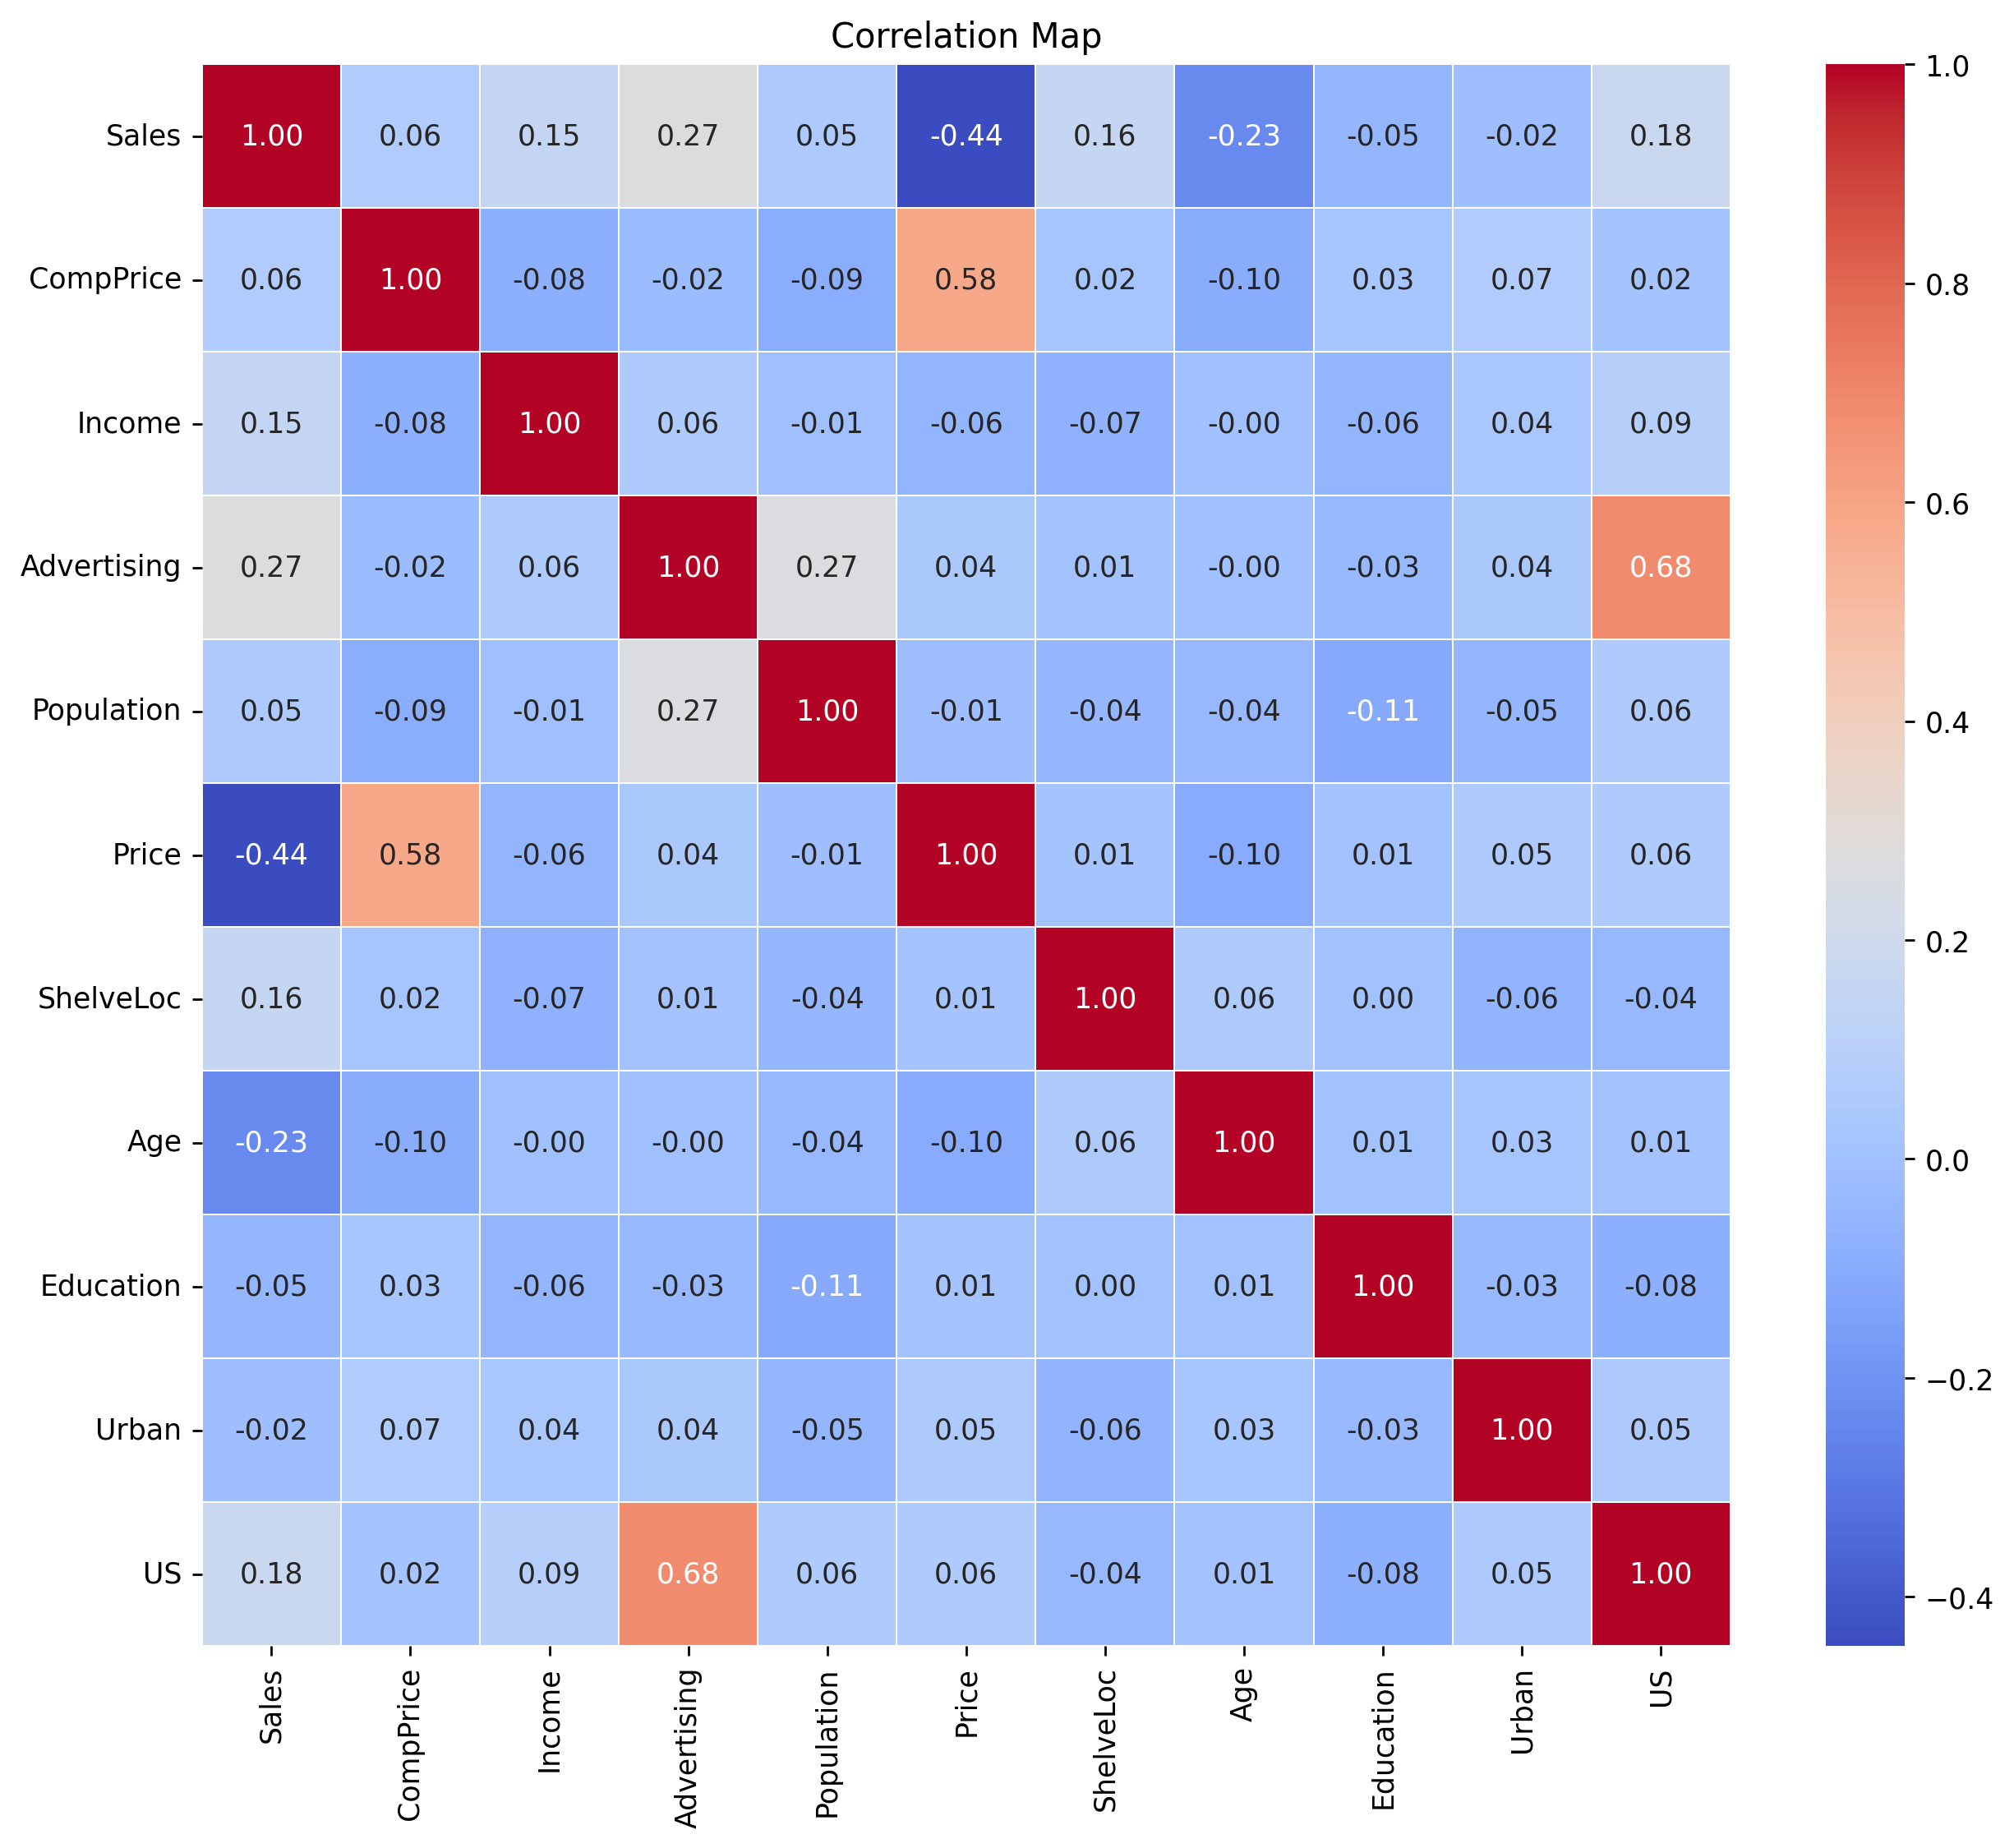

In [ ]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

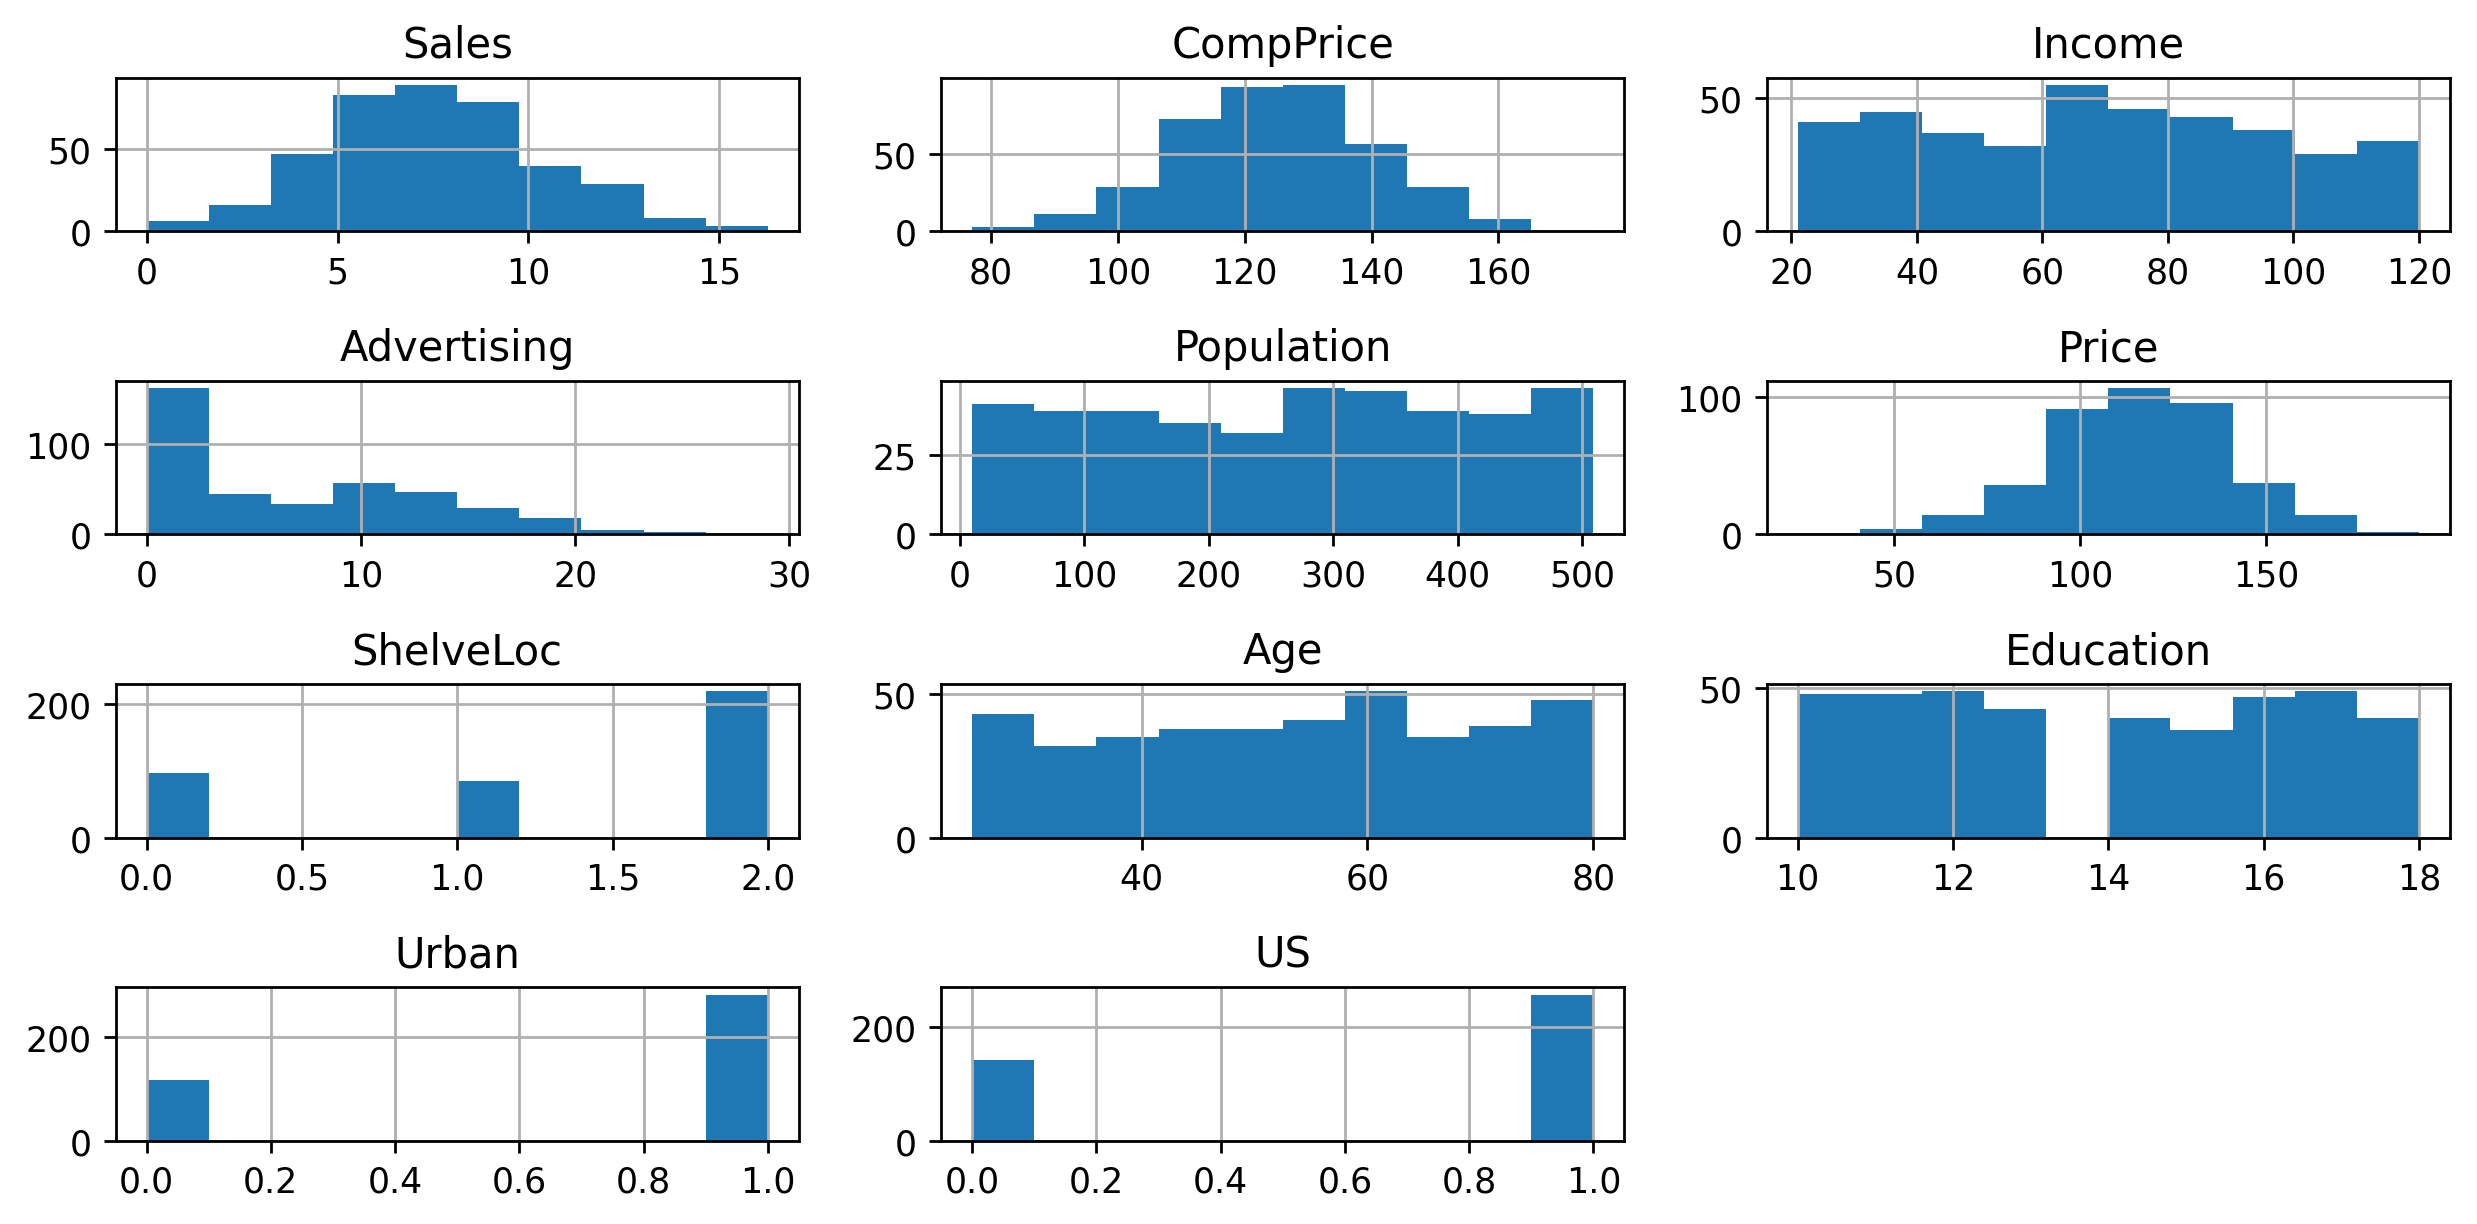

In [ ]:
df.hist()
plt.tight_layout()

In [ ]:
# Pairplot for numerical columns
sns.pairplot(df, hue='Sales')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#scatterplot to understand relatinship

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

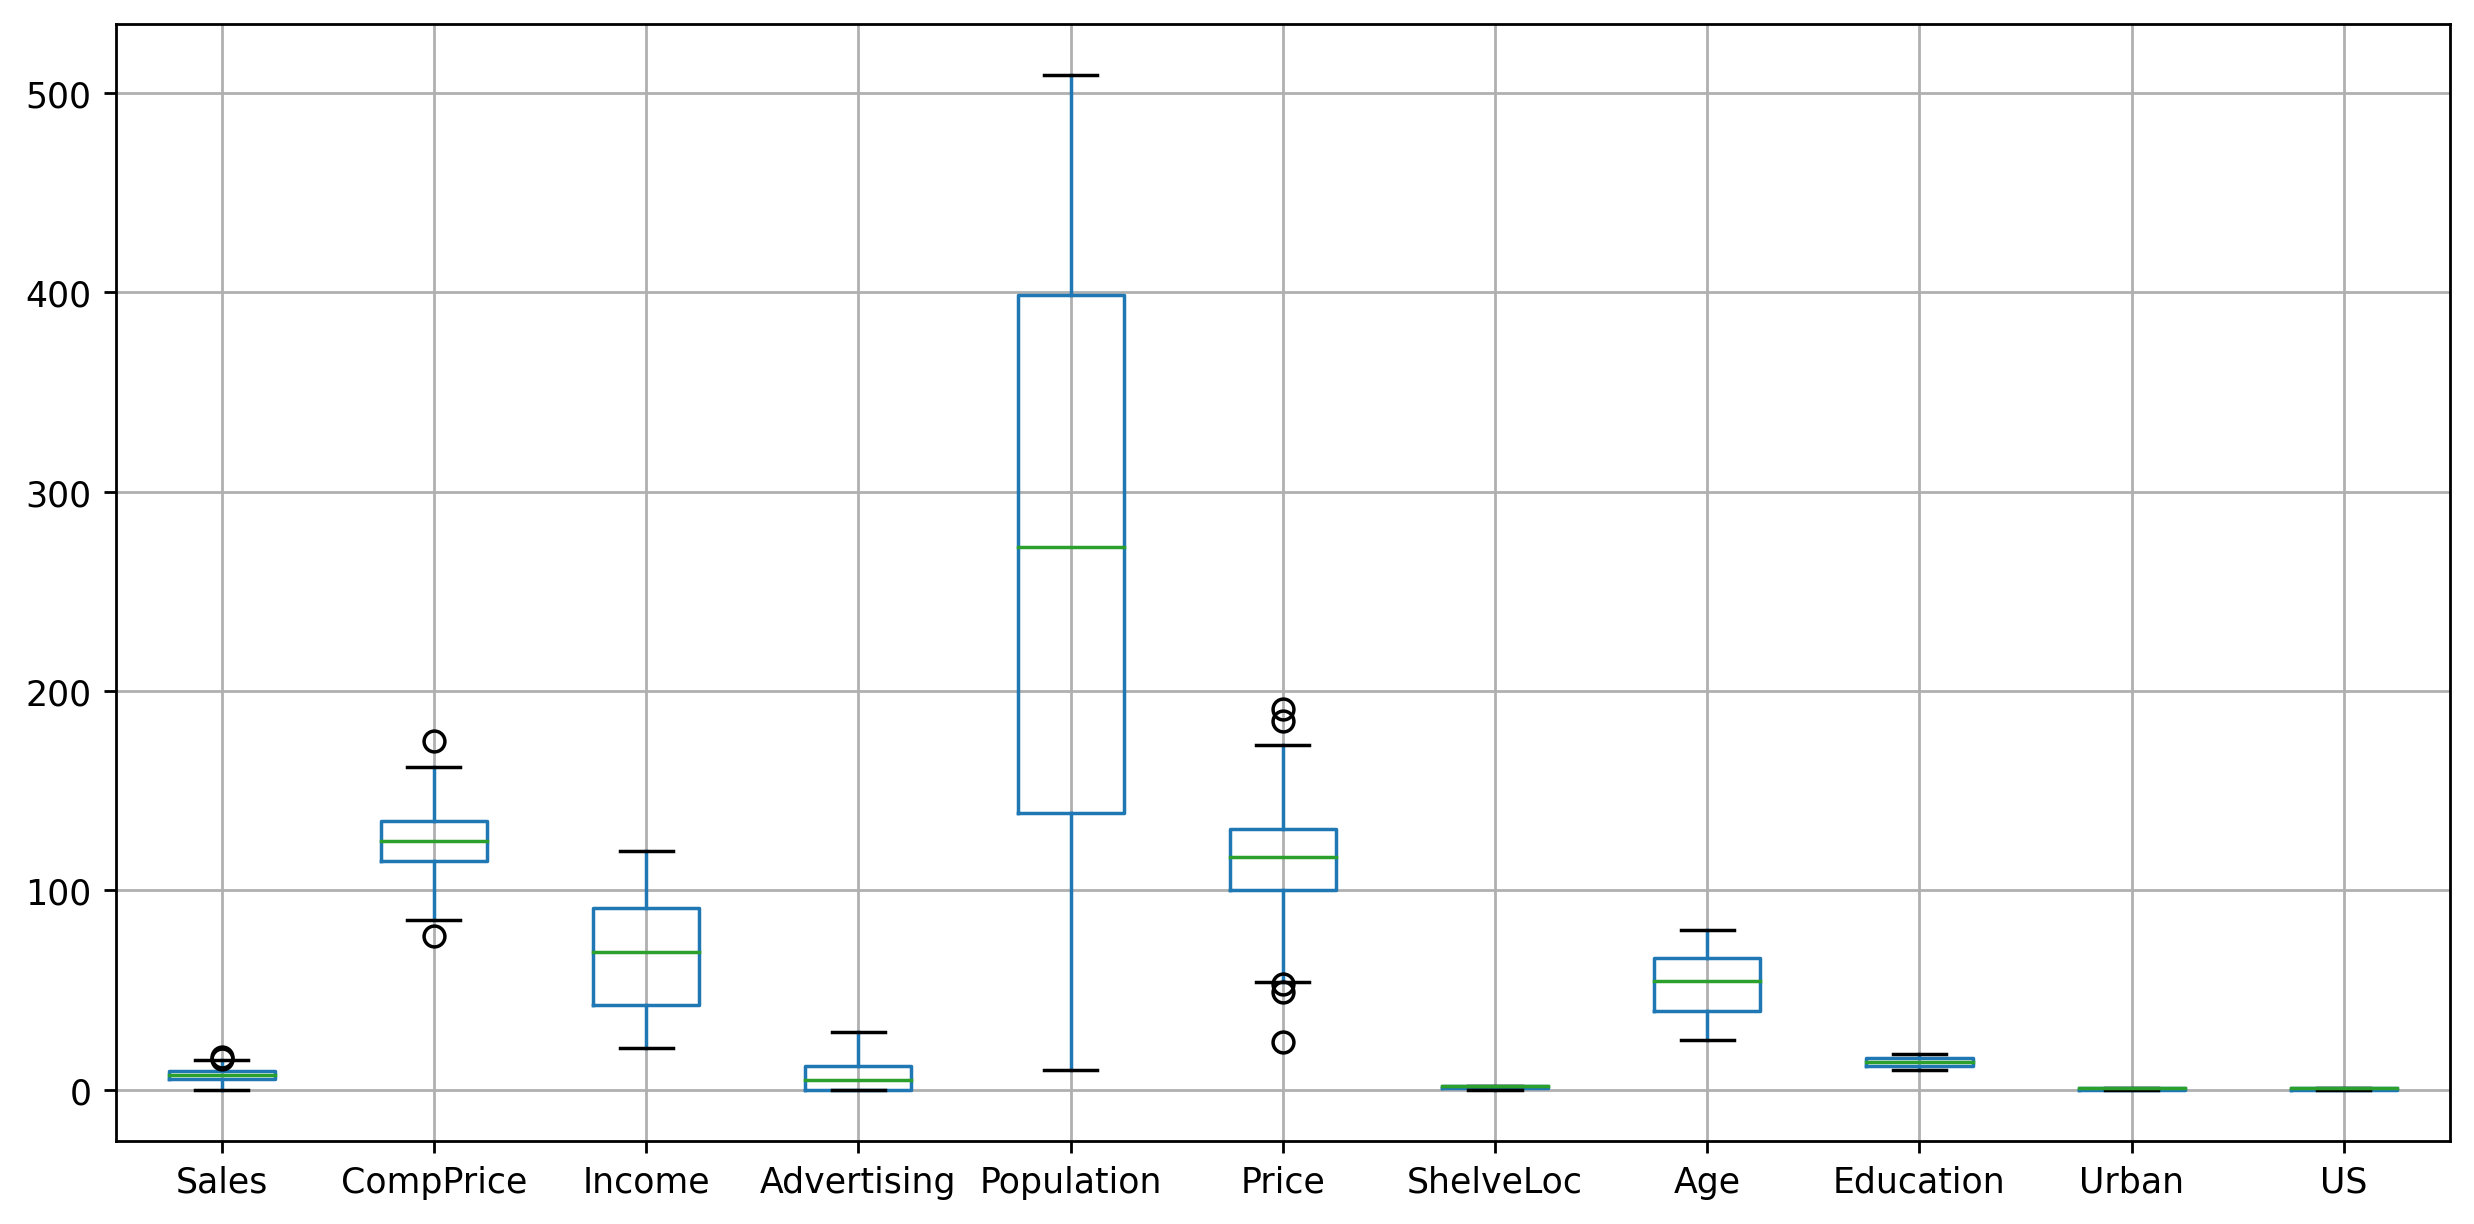

In [ ]:
df.boxplot()
plt.tight_layout()

# for delete outliers

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['Sales', 'CompPrice','Price']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

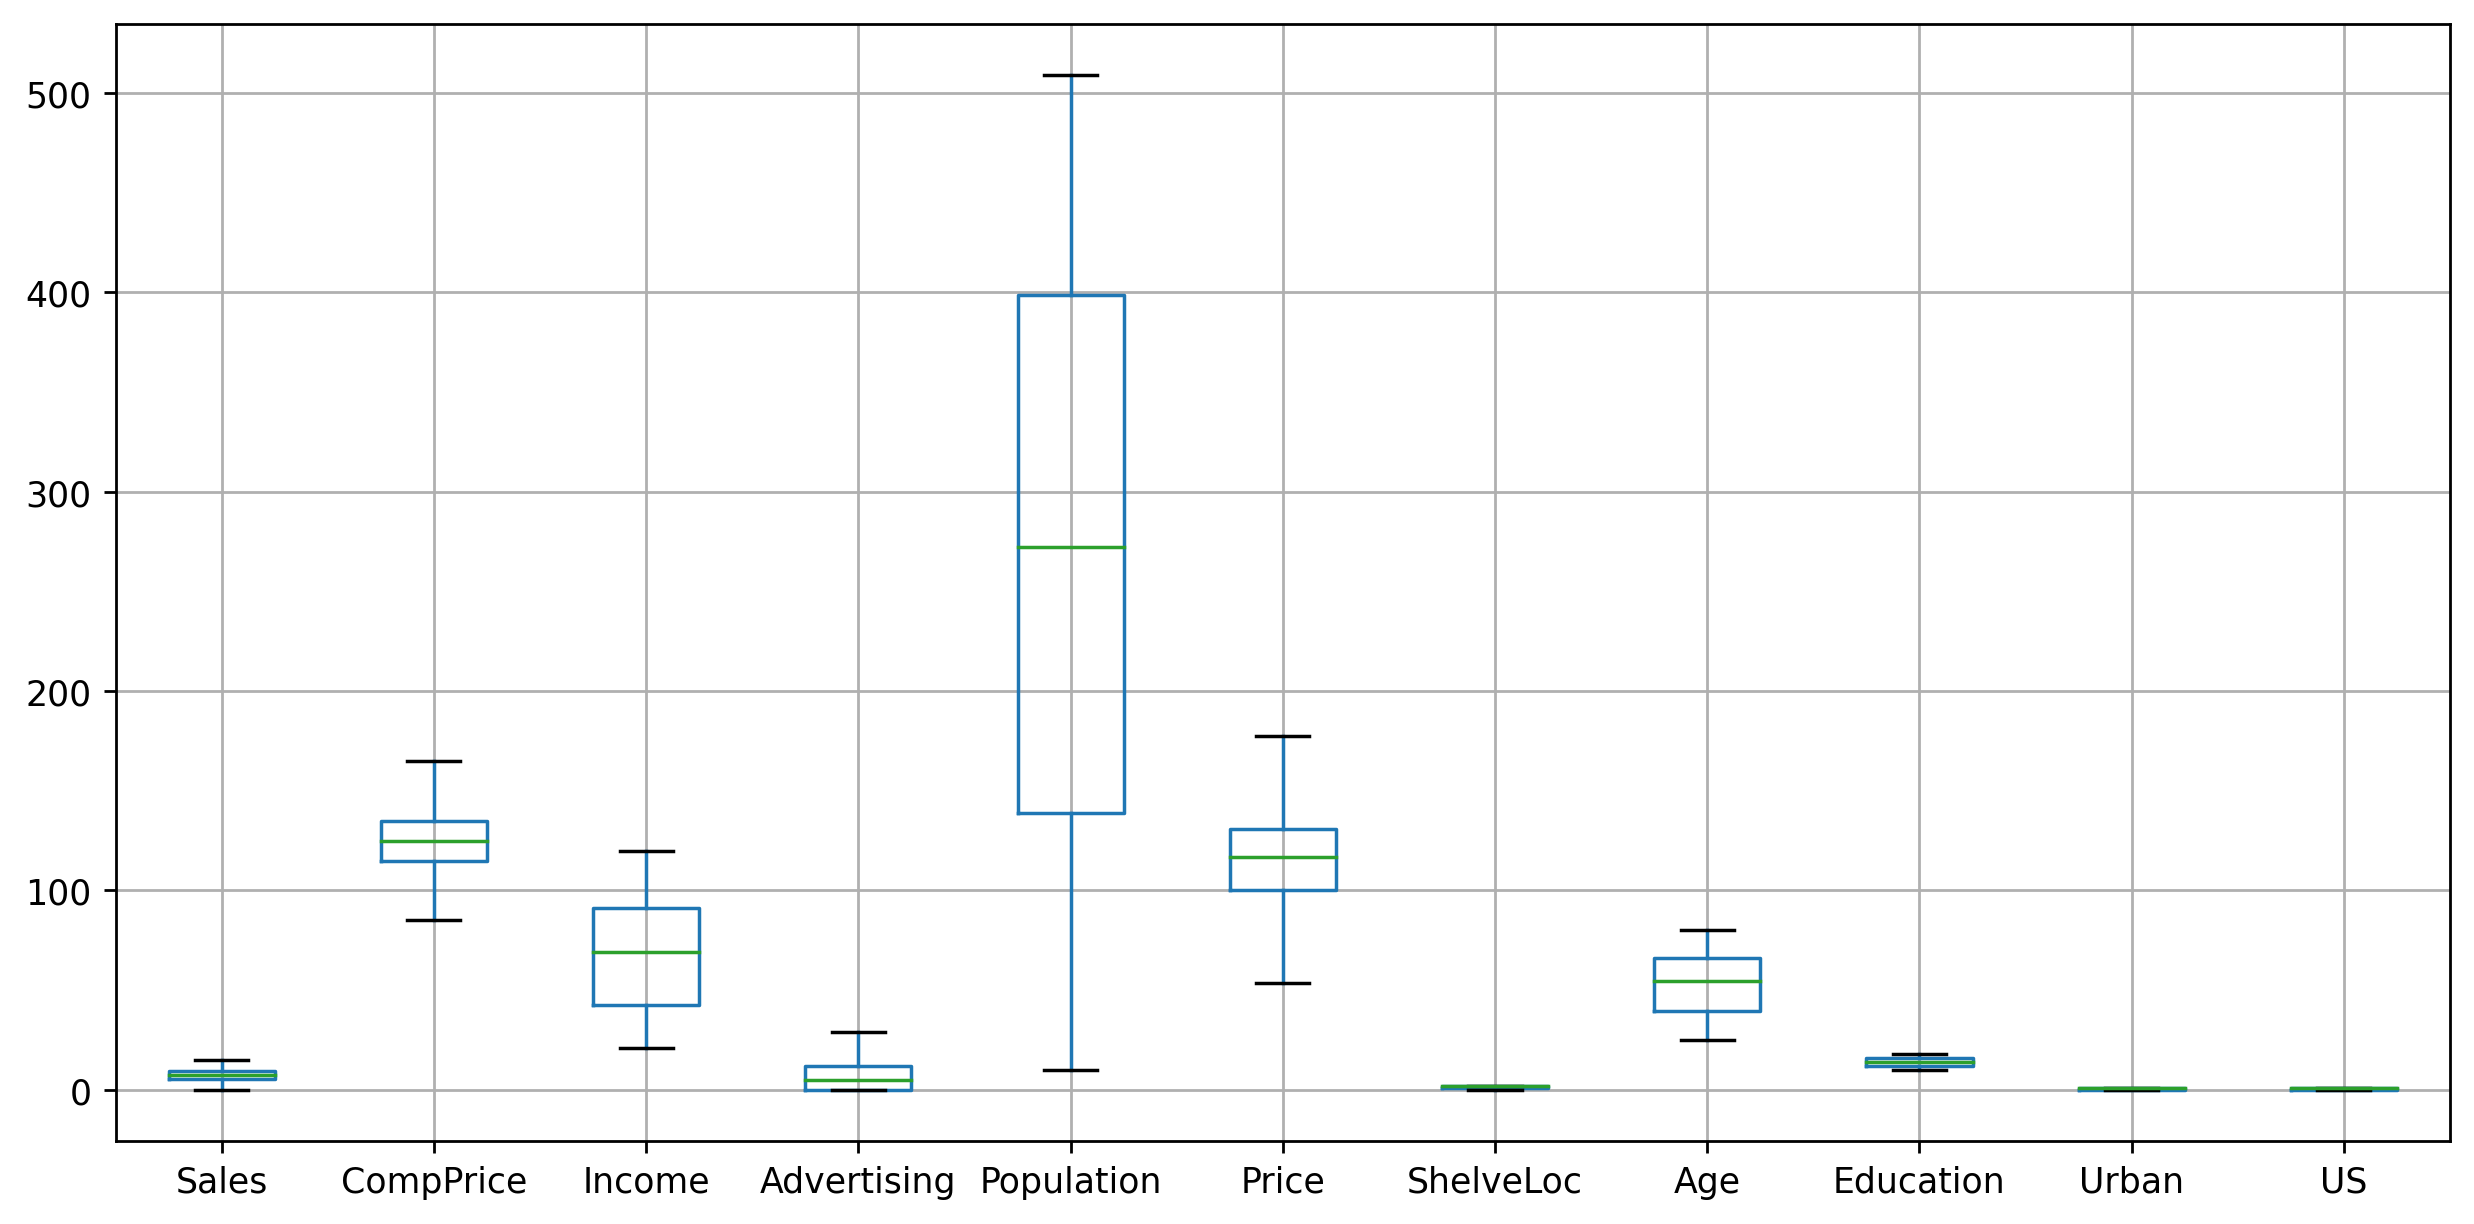

In [ ]:
df.boxplot()
plt.tight_layout()

#feature selection

# PPS score

In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=d0bec37c87eae9b1efc6c9da1e915faeba2f03b6351abaec04b8cf43e3a60b3e
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as ps

In [ ]:
feature_sel = ps.matrix(df)

In [ ]:
feature_sel[feature_sel['y'] == 'Sales']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.0000,1.000000,None
11,CompPrice,Sales,0.000000,regression,True,mean absolute error,2.2585,2.719508,DecisionTreeRegressor()
22,Income,Sales,0.000000,regression,True,mean absolute error,2.2585,2.673045,DecisionTreeRegressor()
33,Advertising,Sales,0.000000,regression,True,mean absolute error,2.2585,2.301130,DecisionTreeRegressor()
44,Population,Sales,0.000000,regression,True,mean absolute error,2.2585,3.170350,DecisionTreeRegressor()
55,Price,Sales,0.000000,regression,True,mean absolute error,2.2585,2.352594,DecisionTreeRegressor()
66,ShelveLoc,Sales,0.150499,regression,True,mean absolute error,2.2585,1.918598,DecisionTreeRegressor()
77,Age,Sales,0.000000,regression,True,mean absolute error,2.2585,2.487608,DecisionTreeRegressor()
88,Education,Sales,0.000000,regression,True,mean absolute error,2.2585,2.314630,DecisionTreeRegressor()
99,Urban,Sales,0.000000,regression,True,mean absolute error,2.2585,2.273426,DecisionTreeRegressor()


# Chi square for feature selection

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='rainbow')

In [ ]:
#Define x and y

In [ ]:
x = df.iloc[:,:-1]
y = df['Sales']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

test = SelectKBest(score_func=f_regression, k=5)
test.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x7b15c719ba30>)

In [ ]:
test.scores_

array([1.62948423e+17, 1.64428762e+00, 9.57192625e+00, 3.10142841e+01,
       9.99718978e-01, 9.75058089e+01, 1.02628987e+01, 2.25859371e+01,
       1.02009768e+00, 1.06083101e-01])

In [ ]:
x.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban'],
      dtype='object')

In [ ]:
pd.DataFrame({
    'Features' : x.columns,
    'Test' : test.scores_
})

,Features,Test
0,Sales,1.629484e+17
1,CompPrice,1.644288e+00
2,Income,9.571926e+00
3,Advertising,3.101428e+01
4,Population,9.997190e-01
5,Price,9.750581e+01
6,ShelveLoc,1.026290e+01
7,Age,2.258594e+01
8,Education,1.020098e+00
9,Urban,1.060831e-01


In [ ]:
x

In [ ]:
pd.DataFrame(test.scores_).T

,0,1,2,3,4,5,6,7,8,9
0,1.629484e+17,1.644288,9.571926,31.014284,0.999719,97.505809,10.262899,22.585937,1.020098,0.106083


In [ ]:
univariate = pd.DataFrame(test.scores_).T
univariate
univariate.columns = x.columns
univariate

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,1.629484e+17,1.644288,9.571926,31.014284,0.999719,97.505809,10.262899,22.585937,1.020098,0.106083


# Recursive Feature Elimination

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

# Assuming x and y are your input features and target variable
rfe = RFECV(estimator=RandomForestRegressor(), step=1, cv=5, scoring='neg_mean_squared_error')
rfe.fit(x, y)

RFECV(cv=5, estimator=RandomForestRegressor(), scoring='neg_mean_squared_error')

In [ ]:
rfe.ranking_

array([ 1,  7,  3,  8,  4,  2, 10,  6,  5,  9])

In [ ]:
rfe_Sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [ ]:
rfe_Sel

,Ranking,Features
0,1,Sales
1,7,CompPrice
2,3,Income
3,8,Advertising
4,4,Population
5,2,Price
6,10,ShelveLoc
7,6,Age
8,5,Education
9,9,Urban


In [ ]:
rfe_Sel[rfe_Sel['Ranking']==1]

,Ranking,Features
0,1,Sales


# Tree Based method

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming x and y are your input features and target variable
dt = DecisionTreeRegressor()
dt.fit(x, y)

DecisionTreeRegressor()

In [ ]:
dt.feature_importances_

array([9.99326322e-01, 4.85055104e-05, 3.97039982e-04, 1.04786926e-05,
       4.91472830e-05, 5.57595086e-06, 4.36997922e-05, 1.08296006e-04,
       1.03837799e-05, 5.51458554e-07])

In [ ]:
ig_sel = pd.DataFrame({
    'IG': dt.feature_importances_,
    'Features' : x.columns
})

In [ ]:
ig_sel

,IG,Features
0,9.993263e-01,Sales
1,4.850551e-05,CompPrice
2,3.970400e-04,Income
3,1.047869e-05,Advertising
4,4.914728e-05,Population
5,5.575951e-06,Price
6,4.369979e-05,ShelveLoc
7,1.082960e-04,Age
8,1.038378e-05,Education
9,5.514586e-07,Urban


In [ ]:
ig_sel.sort_values(by='IG', ascending=False)

,IG,Features
0,9.993263e-01,Sales
2,3.970400e-04,Income
7,1.082960e-04,Age
4,4.914728e-05,Population
1,4.850551e-05,CompPrice
6,4.369979e-05,ShelveLoc
3,1.047869e-05,Advertising
8,1.038378e-05,Education
5,5.575951e-06,Price
9,5.514586e-07,Urban


# decision tree regression Model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Selecting features and target
features = df[['Income', 'ShelveLoc','Advertising','US','Price','Urban','CompPrice']]
target = df['Sales']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([ 2.99,  2.99,  8.77,  4.47,  8.97,  2.52, 11.28,  8.43,  9.16,
       11.28,  4.69,  8.68, 11.93,  5.53,  9.48, 10.36,  6.92, 14.37,
        7.9 ,  5.83,  7.71,  8.7 ,  6.15,  4.42,  9.48,  6.15,  9.32,
        6.67,  6.39,  4.67, 12.49, 13.39,  5.73,  0.53, 12.49,  5.05,
        5.99,  7.82, 12.3 ,  6.52,  3.98,  6.8 , 10.66, 14.37, 11.7 ,
        4.95,  7.56,  7.49,  5.05,  6.44, 12.49,  7.52,  5.99,  9.45,
        9.43,  3.15,  3.47,  9.01, 13.39,  7.62,  8.97, 12.3 ,  7.71,
        4.53,  6.2 ,  8.23, 13.39,  6.52,  5.36, 12.57,  5.87,  5.99,
       10.77,  4.53,  8.19,  6.89,  8.67, 10.27,  5.64,  8.74,  7.36,
       14.37,  4.12,  9.16,  6.92,  8.47,  5.47,  7.36,  3.42,  5.32,
        8.64,  6.23,  7.52, 10.62,  4.96,  7.68,  5.57,  9.7 ,  3.98,
        8.61,  5.07,  9.01,  7.52,  8.89,  5.98, 11.93,  8.74,  6.54,
        6.92,  9.32,  6.54,  8.68, 11.93,  5.3 ,  3.13,  8.31,  9.09,
        7.63,  7.95, 11.22])

In [ ]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(1.0, 0.9974528525558194)

# Hyperparameter tuning

In [ ]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [ ]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=2)

In [ ]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 9, 'splitter': 'best'}

In [ ]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=3,splitter='best')

In [ ]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [ ]:
ypred

array([ 3.92580645,  3.92580645,  9.02860465,  3.92580645,  9.02860465,
        1.55083333, 10.60571429,  9.02860465,  9.02860465, 10.60571429,
        5.26      ,  9.02860465, 12.5497619 ,  5.26      ,  9.02860465,
       10.60571429,  6.56340909, 12.5497619 ,  7.76333333,  5.26      ,
        7.76333333,  9.02860465,  6.56340909,  3.92580645,  9.02860465,
        6.56340909,  9.02860465,  6.56340909,  6.56340909,  5.26      ,
       12.5497619 , 12.5497619 ,  5.26      ,  1.55083333, 12.5497619 ,
        5.26      ,  6.56340909,  7.76333333, 12.5497619 ,  6.56340909,
        3.92580645,  6.56340909, 10.60571429, 12.5497619 , 12.5497619 ,
        5.26      ,  7.76333333,  7.76333333,  5.26      ,  6.56340909,
       12.5497619 ,  7.76333333,  6.56340909,  9.02860465,  9.02860465,
        3.92580645,  3.92580645,  9.02860465, 12.5497619 ,  7.76333333,
        9.02860465, 12.5497619 ,  7.76333333,  3.92580645,  6.56340909,
        7.76333333, 12.5497619 ,  6.56340909,  5.26      , 12.54

In [ ]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9702687195136268, 0.9629804511637269)

In [107]:
# Creating a DataFrame with actual and predicted values
result_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(result_df)

     Actual Sales  Predicted Sales
209          3.02             5.94
280          2.86             6.80
33           8.77            10.62
210          4.36             4.15
93           8.86            11.70
..            ...              ...
246          6.90             6.97
227          8.69            11.07
369         10.26             9.39
176          5.61             6.62
289          8.75             8.70

[80 rows x 2 columns]


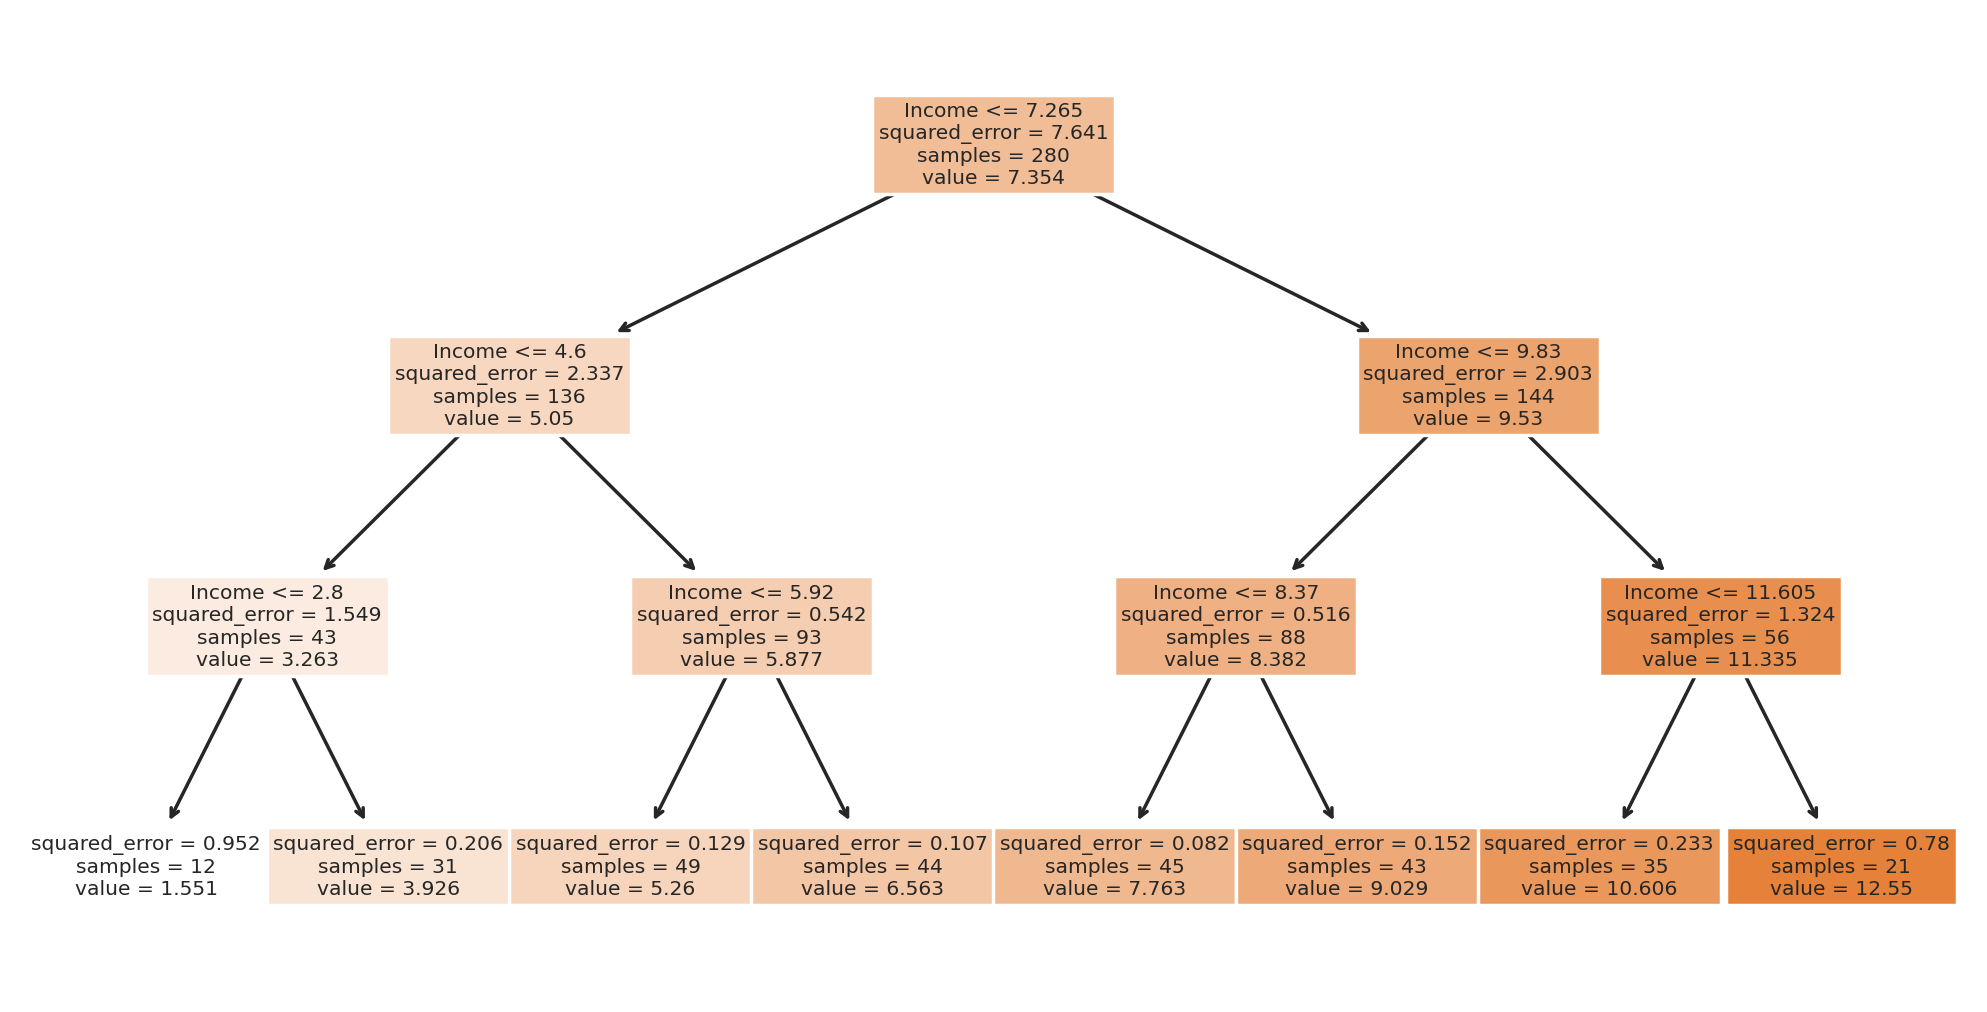

In [ ]:
from sklearn import tree
tree.plot_tree(dtr, feature_names=['Income', 'ShelveLoc','Advertising','US','Price','Urban','CompPrice'],filled=True)
plt.show()